In [113]:
import numpy as np
import pandas as pd 
import matplotlib as plt 
%matplotlib inline 

In [115]:
claim = pd.read_csv('/Users/admin/PycharmProjects/Datathon2020/claims.csv')
claim.dtypes

AmtReimbursed                         int64
DeductibleAmt                       float64
Is_inpatient                          int64
Fraud                                 int64
Gender                                int64
Race                                  int64
RenalDisease                          int64
State                                 int64
County                                int64
InpatientAnnualReimbursementAmt       int64
InpatientAnnualDeductibleAmt          int64
OutpatientAnnualReimbursementAmt      int64
OutpatientAnnualDeductibleAmt         int64
NumOfClaimDays                        int64
Age                                   int64
Death_age                           float64
DiagnosisCode_Num                     int64
ProcedureCode_Num                     int64
ChronicDisease_Num                    int64
PhysiciansNum                         int64
AdmitDiagnosInDiagnos                  bool
FullYearPlanA                          bool
FullYearPlanB                   

In [116]:
new_claim = claim[["NumOfClaimDays","Is_inpatient","Fraud","AmtReimbursed"]]
grouped = new_claim.groupby(["NumOfClaimDays", "Is_inpatient","Fraud"]).agg(
    ["mean","count"]).reset_index()
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped

,NumOfClaimDays_,Is_inpatient_,Fraud_,AmtReimbursed_mean,AmtReimbursed_count
0,0,0,0,233.177389,287689
1,0,0,1,232.660707,165659
2,0,1,0,6104.365079,252
3,0,1,1,6761.189802,353
4,1,0,0,454.055592,7555
...,...,...,...,...,...
112,34,1,0,21545.454545,11
113,34,1,1,19441.176471,17
114,35,1,0,26447.619048,105
115,35,1,1,23805.309735,226


In [27]:
grouped["AmtReimbursed"]["mean"]

NumOfClaimDays  Is_inpatient  Fraud
0               0             0          233.177389
                              1          232.660707
                1             0         6104.365079
                              1         6761.189802
1               0             0          454.055592
                                           ...     
34              1             0        21545.454545
                              1        19441.176471
35              1             0        26447.619048
                              1        23805.309735
36              1             1        15500.000000
Name: mean, Length: 117, dtype: float64

In [117]:
grouped["reimbursed_inpatient_fraud"] = grouped["AmtReimbursed_mean"].loc[(grouped["Is_inpatient_"]==1) & (grouped["Fraud_"] == 1)]
grouped["reimbursed_inpatient_nonfraud"] = grouped["AmtReimbursed_mean"].loc[(grouped["Is_inpatient_"]==1) & (grouped["Fraud_"] == 0)] 
grouped["reimbursed_outpatient_fraud"] = grouped["AmtReimbursed_mean"].loc[(grouped["Is_inpatient_"]==0) & (grouped["Fraud_"] == 1)]
grouped["reimbursed_outpatient_nonfraud"] = grouped["AmtReimbursed_mean"].loc[(grouped["Is_inpatient_"]==0) & (grouped["Fraud_"] == 0)]
grouped

,NumOfClaimDays_,Is_inpatient_,Fraud_,AmtReimbursed_mean,AmtReimbursed_count,reimbursed_inpatient_fraud,reimbursed_inpatient_nonfraud,reimbursed_outpatient_fraud,reimbursed_outpatient_nonfraud
0,0,0,0,233.177389,287689,NaN,NaN,NaN,233.177389
1,0,0,1,232.660707,165659,NaN,NaN,232.660707,NaN
2,0,1,0,6104.365079,252,NaN,6104.365079,NaN,NaN
3,0,1,1,6761.189802,353,6761.189802,NaN,NaN,NaN
4,1,0,0,454.055592,7555,NaN,NaN,NaN,454.055592
...,...,...,...,...,...,...,...,...,...
112,34,1,0,21545.454545,11,NaN,21545.454545,NaN,NaN
113,34,1,1,19441.176471,17,19441.176471,NaN,NaN,NaN
114,35,1,0,26447.619048,105,NaN,26447.619048,NaN,NaN
115,35,1,1,23805.309735,226,23805.309735,NaN,NaN,NaN


In [59]:
grouped.describe()

,NumOfClaimDays_,Is_inpatient_,Fraud_,AmtReimbursed_mean,AmtReimbursed_count,reimbursed_impatient_fraud,reimbursed_inpatient_fraud,reimbursed_inpatient_nonfraud,reimbursed_outpatient_fraud,reimbursed_outpatient_nonfraud
count,117.000000,117.000000,117.000000,117.000000,117.000000,37.000000,37.000000,36.000000,22.000000,22.000000
mean,15.042735,0.623932,0.504274,11139.360236,4771.034188,16224.060429,16224.060429,15791.313725,5139.281192,975.610518
std,9.891997,0.486481,0.502132,12015.172707,30520.269254,4887.086884,4887.086884,5459.322362,21746.281320,2310.072520
min,0.000000,0.000000,0.000000,232.660707,1.000000,6761.189802,6761.189802,6104.365079,232.660707,233.177389
25%,7.000000,0.000000,0.000000,510.904033,69.000000,13670.689127,13670.689127,12242.142704,429.780210,403.270662
50%,14.000000,1.000000,1.000000,12103.900156,353.000000,16733.542320,16733.542320,15819.841270,487.324708,489.209791
75%,22.000000,1.000000,1.000000,17553.214286,948.000000,19441.176471,19441.176471,18256.217908,581.740066,510.492250
max,36.000000,1.000000,1.000000,102500.000000,287689.000000,25882.352941,25882.352941,28500.000000,102500.000000,11300.000000


In [58]:
grouped.to_csv('/Users/admin/PycharmProjects/Datathon2020/ClaimDaysGraph.csv', index=False)

In [118]:
claim['AmtReimbursed'].describe()

count    558211.000000
mean        997.012133
std        3821.534891
min           0.000000
25%          40.000000
50%          80.000000
75%         300.000000
max      125000.000000
Name: AmtReimbursed, dtype: float64

In [119]:
claim['claim_size1'] = np.where(claim['AmtReimbursed']<=40, 1, 0)
claim['claim_size2'] = np.where((claim['AmtReimbursed']>40) & (claim['AmtReimbursed']<=80), 2, 0)
claim['claim_size3'] = np.where((claim['AmtReimbursed']>80) & (claim['AmtReimbursed']<=300), 3, 0)
claim['claim_size4'] = np.where((claim['AmtReimbursed']>300) & (claim['AmtReimbursed']<=125000), 4, 0)
claim['claim_size'] = claim.loc[:,'claim_size1':'claim_size4'].sum(axis=1)
claim['claim_size'].describe()

count    558211.000000
mean          2.460792
std           1.144796
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: claim_size, dtype: float64

In [ ]:
#def f(x):
    #if x['AmtReimbursed']<=40:
        #return ''

In [120]:
del claim['claim_size1']
del claim['claim_size2']
del claim['claim_size3']
del claim['claim_size4']
claim

,AmtReimbursed,DeductibleAmt,Is_inpatient,Fraud,Gender,Race,RenalDisease,State,County,InpatientAnnualReimbursementAmt,...,Age,Death_age,DiagnosisCode_Num,ProcedureCode_Num,ChronicDisease_Num,PhysiciansNum,AdmitDiagnosInDiagnos,FullYearPlanA,FullYearPlanB,claim_size
0,26000,1068.0,1,1,1,1,0,39,230,36000,...,24208,NaN,9,0,4,1,False,True,True,4
1,19000,1068.0,1,1,2,1,0,39,230,19000,...,34749,NaN,9,2,6,3,False,True,True,4
2,17000,1068.0,1,1,1,1,0,39,600,17000,...,31793,NaN,9,1,9,2,True,True,True,4
3,13000,1068.0,1,1,2,1,0,39,280,27000,...,28971,NaN,7,1,5,3,False,True,True,4
4,3000,1068.0,1,1,2,2,0,39,510,3000,...,30445,NaN,1,1,8,2,False,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,3300,0.0,0,0,1,2,0,25,150,0,...,29869,NaN,1,0,6,2,False,True,True,4
558207,1900,0.0,0,0,1,1,0,21,230,15000,...,24742,NaN,1,0,6,1,False,True,True,4
558208,2100,0.0,0,0,2,1,1,5,200,0,...,23049,NaN,2,0,5,1,False,True,True,4
558209,10,0.0,0,0,2,1,0,16,490,0,...,30939,NaN,1,0,2,1,False,True,True,1


In [72]:
claim.to_csv('/Users/admin/PycharmProjects/Datathon2020/ClaimSize.csv', index=False)

In [121]:
graph_data = claim[['claim_size', 'Fraud','AmtReimbursed']]
graph_data

,claim_size,Fraud,AmtReimbursed
0,4,1,26000
1,4,1,19000
2,4,1,17000
3,4,1,13000
4,4,1,3000
...,...,...,...
558206,4,0,3300
558207,4,0,1900
558208,4,0,2100
558209,1,0,10


In [122]:
grouped_data = graph_data.groupby(["claim_size", 'Fraud']).count().reset_index().rename(columns={'AmtReimbursed':'count'})
grouped_data 

,claim_size,Fraud,count
0,1,0,100419
1,1,1,58198
2,2,0,77189
3,2,1,44388
4,3,0,88772
5,3,1,51426
6,4,0,79035
7,4,1,58784


In [123]:
grouped_data=grouped_data.pivot(index='claim_size', columns='Fraud', values='count').reset_index().rename(columns={0:'fraud', 1:'non_fraud'})
grouped_data

Fraud,claim_size,fraud,non_fraud
0,1,100419,58198
1,2,77189,44388
2,3,88772,51426
3,4,79035,58784


In [124]:
grouped_data['fraud_percentage'] = grouped_data['fraud']/(grouped_data['fraud']+grouped_data['non_fraud'])*100
grouped_data['non_fraud_per'] = grouped_data['non_fraud']/(grouped_data['fraud']+grouped_data['non_fraud'])*100
grouped_data.set_index('claim_size')

Fraud,fraud,non_fraud,fraud_percentage,non_fraud_per
claim_size,,,,
1,100419,58198,63.309103,36.690897
2,77189,44388,63.489805,36.510195
3,88772,51426,63.319020,36.680980
4,79035,58784,57.346955,42.653045


<AxesSubplot:xlabel='claim_size'>

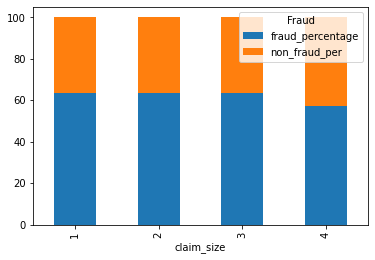

In [125]:
grouped_data[['claim_size', 'fraud_percentage','non_fraud_per']].plot(kind='bar', x= 'claim_size',stacked=True)
#only claim size = 4 is very different from the other three sizes. 
#one possible reason is that some potential fraud providers thought the audit department will focus on large claims (large reimbursement amount).

In [126]:
subgraph_data = claim[['claim_size', 'Fraud','AmtReimbursed', 'Is_inpatient']]
subgraph_data

,claim_size,Fraud,AmtReimbursed,Is_inpatient
0,4,1,26000,1
1,4,1,19000,1
2,4,1,17000,1
3,4,1,13000,1
4,4,1,3000,1
...,...,...,...,...
558206,4,0,3300,0
558207,4,0,1900,0
558208,4,0,2100,0
558209,1,0,10,0


In [130]:
grouped1 = subgraph_data.groupby(['Is_inpatient', "claim_size", 'Fraud']).count().reset_index().rename(columns={'AmtReimbursed':'count'})
grouped1 

,Is_inpatient,claim_size,Fraud,count
0,0,1,0,99951
1,0,1,1,57573
2,0,2,0,77184
3,0,2,1,44378
4,0,3,0,88719
5,0,3,1,51385
6,0,4,0,62489
7,0,4,1,36058
8,1,1,0,468
9,1,1,1,625


In [133]:
inpatient = grouped1[grouped1['Is_inpatient']== 1]
inpatient

,Is_inpatient,claim_size,Fraud,count
8,1,1,0,468
9,1,1,1,625
10,1,2,0,5
11,1,2,1,10
12,1,3,0,53
13,1,3,1,41
14,1,4,0,16546
15,1,4,1,22726


In [134]:
inpatient=inpatient.pivot(index='claim_size', columns='Fraud', values='count').reset_index().rename(columns={0:'fraud', 1:'non_fraud'})
inpatient

Fraud,claim_size,fraud,non_fraud
0,1,468,625
1,2,5,10
2,3,53,41
3,4,16546,22726


In [135]:
inpatient['fraud_percentage'] = inpatient['fraud']/(inpatient['fraud']+inpatient['non_fraud'])*100
inpatient['non_fraud_per'] = inpatient['non_fraud']/(inpatient['fraud']+inpatient['non_fraud'])*100
inpatient.set_index('claim_size')

Fraud,fraud,non_fraud,fraud_percentage,non_fraud_per
claim_size,,,,
1,468,625,42.817932,57.182068
2,5,10,33.333333,66.666667
3,53,41,56.382979,43.617021
4,16546,22726,42.131799,57.868201


<AxesSubplot:xlabel='claim_size'>

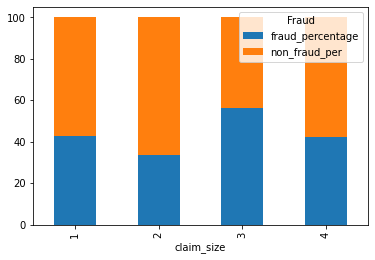

In [136]:
inpatient[['claim_size', 'fraud_percentage','non_fraud_per']].plot(kind='bar', x= 'claim_size',stacked=True)
# no pattern of percentage to total gragh for inpatients

<AxesSubplot:xlabel='claim_size'>

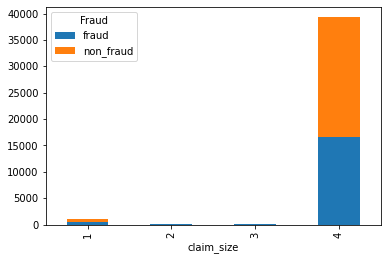

In [137]:
inpatient[['claim_size', 'fraud','non_fraud']].plot(kind='bar', x= 'claim_size',stacked=True)
# the reason is that inpatients' claims mainly have size 4 -- large reimbursement amount.
# the fraud rate is quite below that of all patients!!

In [138]:
outpatient = grouped1[grouped1['Is_inpatient']== 0]
outpatient

,Is_inpatient,claim_size,Fraud,count
0,0,1,0,99951
1,0,1,1,57573
2,0,2,0,77184
3,0,2,1,44378
4,0,3,0,88719
5,0,3,1,51385
6,0,4,0,62489
7,0,4,1,36058


In [139]:
outpatient=outpatient.pivot(index='claim_size', columns='Fraud', values='count').reset_index().rename(columns={0:'fraud', 1:'non_fraud'})
outpatient

Fraud,claim_size,fraud,non_fraud
0,1,99951,57573
1,2,77184,44378
2,3,88719,51385
3,4,62489,36058


In [140]:
outpatient['fraud_percentage'] = outpatient['fraud']/(outpatient['fraud']+outpatient['non_fraud'])*100
outpatient['non_fraud_per'] = outpatient['non_fraud']/(outpatient['fraud']+outpatient['non_fraud'])*100
outpatient.set_index('claim_size')

Fraud,fraud,non_fraud,fraud_percentage,non_fraud_per
claim_size,,,,
1,99951,57573,63.451284,36.548716
2,77184,44378,63.493526,36.506474
3,88719,51385,63.323674,36.676326
4,62489,36058,63.410352,36.589648


<AxesSubplot:xlabel='claim_size'>

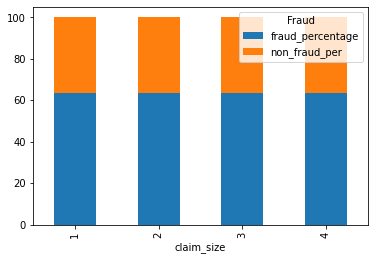

In [141]:
outpatient[['claim_size', 'fraud_percentage','non_fraud_per']].plot(kind='bar', x= 'claim_size',stacked=True)
# Almost same fraud rate around 63% for outpatients across claim sizes

<AxesSubplot:xlabel='claim_size'>

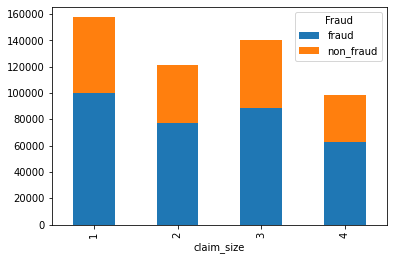

In [142]:
outpatient[['claim_size', 'fraud','non_fraud']].plot(kind='bar', x= 'claim_size',stacked=True)
# Note that number of claims is large for each category.
# In general, no pattern of correlation between claims' reimburment amounts(claim size) and fraud rate for outpatients
# for inpatients, their claims mainly have size of 4 (i.e. above 3rd quartile of reimbursement amount)
# and their fraud rate is much below that of all patients.
# Conclude a pattern between claims' reimburment amounts(claim size) and fraud rate for all patients based on their type!!
# Consider further model to test....